## Load Data and Data Exploration

In [1]:
import re
import numpy as np 
import pandas as pd

In [2]:
# load data from csv
listings = pd.read_csv("iproperty_listing.csv.tar.gz", compression='gzip', low_memory=False)

In [3]:
# perform general exploration
listings.head()

,iproperty_listing.csv,kind,title,subtitle,tier,propertyType,color,transacted,price_type,price_currency,...,attr_transportDescription,attr_governmentWebsite,attr_minimumStay,attr_architectName,attr_contractorName,attr_projectType,attr_budgetRange,poi_education,poi_healthcare,poi_transportation
0,sale-8526600,property,"Taman Sri Pulai, Jempol",NaN,1.0,1-sty Terrace/Link House,NaN,NaN,sale,MYR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,sale-8726821,property,"Pekan Mahsan, Jempol",NaN,1.0,Residential Land,NaN,NaN,sale,MYR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,sale-8114392,property,"The Light Point, Gelugor",NaN,1.0,Condominium,NaN,NaN,sale,MYR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1.0,0.0
3,sale-8081290,property,"The Light Collection II, Gelugor",NaN,1.0,Condominium,NaN,NaN,sale,MYR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,2.0,0.0
4,sale-7691638,property,"The Light Point, Gelugor",NaN,1.0,Condominium,NaN,NaN,sale,MYR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1.0,0.0


In [4]:
listings.isnull().sum().sort_values(ascending = False)

transacted                             68769
price_minPricePerSizeUnitByLandArea    68769
attr_buildYear                         68769
attr_developerName                     68769
attr_hasImage360                       68769
                                       ...  
state                                      1
city                                       1
poi_healthcare                             1
poi_education                              1
iproperty_listing.csv                      1
Length: 102, dtype: int64

In [5]:
listings.shape

(68769, 102)

## Drop Unuseful Columns

In [6]:
# drop all columns without any data
listings.dropna(how='all', axis=1, inplace=True)

In [7]:
listings.shape

(68769, 53)

In [8]:
listings.isnull().sum().sort_values(ascending = False)

price_maxPricePerSizeUnitByBuiltUp           68742
attr_completionStatus                        68738
price_minPricePerSizeUnitByBuiltUp           68723
attr_promotion                               68709
attr_projectLandEncumbrance                  68700
attr_projectApprovalAuthorityBuildingPlan    68685
attr_projectBuildingReferenceNo              68685
attr_projectAdvertisingPermitValidity        68685
attr_projectLicenseValidity                  68684
attr_projectAdvertisingPermit                68680
attr_highlight                               68646
attr_completionDate                          68603
attr_projectStage                            68586
color                                        68586
attr_bumiDiscount                            68586
attr_totalUnits                              68586
attr_maintenanceFee                          67267
attr_auctionDate                             66089
attr_maximumPricePerSizeUnit                 62780
attr_pricePSF                  

In [9]:
# drop columns which majority of rows contain no data
listings.drop(['price_maxPricePerSizeUnitByBuiltUp', 'attr_completionStatus',
       'price_minPricePerSizeUnitByBuiltUp', 'attr_promotion',
       'attr_projectLandEncumbrance',
       'attr_projectApprovalAuthorityBuildingPlan',
       'attr_projectBuildingReferenceNo',
       'attr_projectAdvertisingPermitValidity', 'attr_projectLicenseValidity',
       'attr_projectAdvertisingPermit', 'attr_highlight',
       'attr_completionDate', 'attr_projectStage', 'color',
       'attr_bumiDiscount', 'attr_totalUnits', 'attr_maintenanceFee',
       'attr_auctionDate', 'attr_maximumPricePerSizeUnit', 'attr_pricePSF',
       'attr_minimumPricePerSizeUnit'], axis=1, inplace=True)

In [10]:
listings.shape

(68769, 32)

## Fill Missing Categorial Data

In [11]:
# list columns and their null value count
col_with_na = listings.isnull().sum()
col_with_na[~(col_with_na==0)]

iproperty_listing.csv        1
kind                         1
title                        1
tier                         1
propertyType                 1
price_type                   1
price_currency               1
price_min                    1
price_max                    1
formatedAddress              1
latitude                 20494
longitude                20495
state                        1
city                         1
township                 39130
attr_bedroom              3860
attr_bathroom             4135
attr_landArea            32008
attr_builtUp             11033
attr_carPark             26308
attr_furnishing          17412
attr_landTitleType       21577
attr_tenure              10117
attr_facingDirection     46812
attr_unitType            30853
attr_occupancy           33694
attr_titleType           23054
attr_sizeUnit              185
attr_downloadUrl           184
poi_education                1
poi_healthcare               1
poi_transportation           1
dtype: i

In [12]:
listings['attr_facingDirection'].value_counts()

Unknown      7674
North        3672
South        3458
East         1622
NorthEast    1561
SouthEast    1323
SouthWest    1157
NorthWest     912
West          578
Name: attr_facingDirection, dtype: int64

In [13]:
listings['attr_facingDirection'].fillna(value='Unknown', inplace=True)

In [14]:
listings['attr_occupancy'].value_counts()

Vacant            23185
Tenanted           5161
Owner Occupied     4406
Unknown            2323
Name: attr_occupancy, dtype: int64

In [15]:
listings['attr_occupancy'].fillna(value='Unknown', inplace=True)

In [16]:
listings['attr_unitType'].value_counts()

Intermediate    24625
Corner          10207
EndLot           2081
Duplex            412
Penthouse         286
Studio            197
SOHO               64
Triplex            44
Name: attr_unitType, dtype: int64

In [17]:
listings['attr_unitType'].fillna(value='Unknown', inplace=True)

In [18]:
listings['attr_titleType'].value_counts()

Individual    25961
Strata        18463
Unknown        1291
Name: attr_titleType, dtype: int64

In [19]:
listings['attr_titleType'].fillna(value='Unknown', inplace=True)

In [20]:
listings['attr_landTitleType'].value_counts()

Residential    43954
Commercial      2556
Unknown          471
Industrial       211
Name: attr_landTitleType, dtype: int64

In [21]:
listings['attr_landTitleType'].fillna(value='Unknown', inplace=True)

In [22]:
listings['attr_furnishing'].value_counts()

Partly Furnished    24380
Fully Furnished     13263
Unfurnished         12752
Unknown               962
Name: attr_furnishing, dtype: int64

In [23]:
listings['attr_furnishing'].fillna(value='Unknown', inplace=True)

In [24]:
listings['attr_tenure'].value_counts()

Freehold               42844
Leasehold              14985
Malay Reserved Land      474
Lease Tenancy            189
Unknown                  160
Name: attr_tenure, dtype: int64

In [25]:
listings['attr_tenure'].fillna(value='Unknown', inplace=True)

In [26]:
listings['attr_sizeUnit'].value_counts()

SQUARE_FEET      67999
ACRES              323
SQUARE_METERS      251
HECTARE             11
Name: attr_sizeUnit, dtype: int64

In [27]:
# do not fill size unit, this column is important for later part, rows without data will be dropped

## Further Exploration On Numerical Data 

In [28]:
# the following columns consist of data with inconsistent format
# they are mixed of categorial, string & numerical data, need to study on the data first before cleaning

In [29]:
listings['attr_landArea'].value_counts()

22x75         1162
20x70         1025
22x70          766
1400           744
1,400          500
              ... 
88,800           1
40.45 Acer       1
1,132            1
4.647            1
1,969            1
Name: attr_landArea, Length: 8945, dtype: int64

In [30]:
listings['attr_builtUp'].value_counts()

2,000    1046
1,400     879
1,800     825
1,600     733
3,000     714
         ... 
1,412       1
1,764       1
2,687       1
6,878       1
3,405       1
Name: attr_builtUp, Length: 4926, dtype: int64

In [31]:
listings['attr_carPark'].value_counts()

2        20806
1        11414
3         4058
4         3614
6         1104
5          726
8          209
10         206
7           82
0           52
20          33
30          25
12          19
1 - 2       18
2 - 3       17
9           16
15          13
2 - 4        9
1 - 3        9
11           6
14           4
17           3
13           3
16           2
1 - 4        2
2 - 6        2
18           2
3 - 6        1
1 - 5        1
23           1
4 - 6        1
28           1
3 - 4        1
0 - 2        1
Name: attr_carPark, dtype: int64

In [32]:
listings['attr_bathroom'].value_counts()

2        22860
3        16764
4         8308
5         6054
1         4229
6         3661
7         1681
8          581
9          206
10          87
12          25
20          23
11          21
0           17
2 - 3       14
1 - 2       14
13          13
15          12
1 - 3        8
14           8
5 - 6        6
4 - 5        6
3 - 4        6
1 - 5        3
16           3
17           3
1 - 4        3
2 - 5        2
4 - 6        2
2 - 4        2
0 - 3        2
6 - 7        2
3 - 6        2
2 - 6        1
2 - 9        1
5 - 7        1
0 - 4        1
6 - 8        1
7 - 8        1
Name: attr_bathroom, dtype: int64

In [33]:
listings['attr_bedroom'].value_counts()

3        17241
4        14863
4+1       5484
3+1       5291
5         4375
         ...  
1 - 7        1
17           1
16           1
4 - 7        1
11+          1
Name: attr_bedroom, Length: 65, dtype: int64

## Drop Rows With Missing important Data

In [34]:
# drop rows with no size unit
listings.dropna(subset=['attr_sizeUnit'], inplace=True)

In [35]:
# drop rows with no data in both attr_landArea and attr_builtUp
listings.dropna(subset=['attr_landArea', 'attr_builtUp'], how='all', inplace=True)

In [36]:
# drop rows without latitude, longitude and township 
listings.dropna(subset=['latitude', 'longitude', 'township'], how='all', inplace=True)

In [37]:
# some listings are not specifically for a particular type of property, drop these type of listings
listings = listings[
    (~listings['attr_landArea'].str.contains('~', na = False)) & 
    (~listings['attr_landArea'].str.contains('-', na = False)) & 
    (~listings['attr_landArea'].str.contains('/', na = False))
]

In [38]:
# remaining columns with NaN value for further action
col_with_na = listings.isnull().sum()
col_with_na[~(col_with_na==0)]

latitude          2692
longitude         2693
township         21120
attr_bedroom      2014
attr_bathroom     2218
attr_landArea    28301
attr_builtUp      5121
attr_carPark     16561
dtype: int64

In [39]:
listings.shape

(49714, 32)

## Cleaning/Correcting Data

### Discrepancies and Issues between attr_landArea, attr_builtUp and attr_sizeUnit

In [40]:
# convert to lower case
listings['attr_landArea'] = listings['attr_landArea'].str.lower()
listings['attr_builtUp'] = listings['attr_builtUp'].str.lower()

# remove characters single quotes ('), double quotes (") and commas(,)
listings['attr_landArea'] = listings['attr_landArea'].str.replace("['\"`’,]", "")
listings['attr_builtUp'] = listings['attr_builtUp'].str.replace("['\"`’,]", "")

# some values are in area dimension instead, replace x and X with *
listings['attr_landArea'] = listings['attr_landArea'].str.replace("[×x]", "*")
listings['attr_builtUp'] = listings['attr_builtUp'].str.replace("[×x]", "*")

# listings[['attr_landArea', 'attr_builtUp']]

In [41]:
# attr_landArea labeled with sqm as uom, but attr_builtUp and attr_sizeUnit could be in sqf

# find rows with sq meter explicitly stated in attr_landArea
listings_sqm = listings[(listings['attr_landArea'].str.contains('sq', na = False)) & listings['attr_landArea'].str.contains('m', na = False)][['attr_landArea', 'attr_builtUp', 'attr_sizeUnit', 'propertyType']]

# clean attr_landArea
listings_sqm['attr_landArea'] = listings_sqm['attr_landArea'].str.extract('(\d*\.?\d?\d)').astype(float)

# clean attr_builtUp
listings_sqm['attr_builtUp'] = listings_sqm['attr_builtUp'].astype(float)

# correct attr_sizeUnit
listings_sqm['attr_sizeUnit'] = 'SQUARE_METERS'

# compute builtUp to landArea ratio to detect if the builtUp area could be in different uom
listings_sqm['attr_builtUp_to_landArea'] = listings_sqm['attr_builtUp'] / listings_sqm['attr_landArea']

listings_sqm[listings_sqm['attr_builtUp_to_landArea'] > 10]

,attr_landArea,attr_builtUp,attr_sizeUnit,propertyType,attr_builtUp_to_landArea
34095,205.0,3272.0,SQUARE_METERS,3-sty Terrace/Link House,15.960976
60489,111.0,1195.0,SQUARE_METERS,1-sty Terrace/Link House,10.765766


In [42]:
# correct attr_builtUp if attr_builtUp is unreasonably higher than attr_landArea


def sqf_to_sqm (x):
    return x * 0.09290304


# convert from sqf to sqm (assume builtUp is in sqf if it's 10 time higher than landArea)
listings_sqm.loc[
    listings_sqm['attr_builtUp_to_landArea'] > 10, 'attr_builtUp'
] = listings_sqm.loc[
    listings_sqm['attr_builtUp_to_landArea'] > 10, 'attr_builtUp'
].apply(
    lambda x: sqf_to_sqm(x)
)

# listings_sqm

In [43]:
# update the original listings with the corrected values
listings.loc[listings_sqm.index, 'attr_landArea'] = listings_sqm[['attr_landArea']]
listings.loc[listings_sqm.index, 'attr_builtUp'] = listings_sqm[['attr_builtUp']]
listings.loc[listings_sqm.index, 'attr_sizeUnit'] = listings_sqm[['attr_sizeUnit']]



In [44]:
# find rows with acre and hectare explicitly stated in attr_landArea
listings_land = listings[(listings['attr_landArea'].str.contains('ac', na = False)) | listings['attr_landArea'].str.contains('hec', na = False)][['attr_landArea', 'attr_builtUp', 'attr_sizeUnit', 'propertyType', 'price_min']]
listings_land

,attr_landArea,attr_builtUp,attr_sizeUnit,propertyType,price_min
5818,10000 acres,5000,SQUARE_FEET,Bungalow,788000.0
7850,9 acres,NaN,SQUARE_FEET,Residential Land,4700000.0
11608,1 acre,1,ACRES,Residential Land,1960000.0
16183,40.45 acer,1029,SQUARE_FEET,Apartment,304000.0
18969,3.66 acres,NaN,SQUARE_FEET,Residential Land,30000000.0
31350,2 acres,NaN,SQUARE_FEET,Bungalow,980000.0
31550,8 acres,NaN,ACRES,Residential Land,10200000.0
45482,0.23 hectares,NaN,HECTARE,Residential Land,20500.0
45484,0.23 hectares,NaN,HECTARE,1-sty Terrace/Link House,33500.0
48147,5 acres,1066,SQUARE_FEET,Serviced Residence,388888.0


In [45]:
# not reasonable for property with such land area & selling price, other than Residential/Bungalow Land
# correct the uom and remove land area for such non Land type listing
listings_land.loc[~listings_land['propertyType'].str.contains('Land', na = False), 'attr_landArea'] = np.nan
listings_land.loc[~listings_land['propertyType'].str.contains('Land', na = False), 'attr_sizeUnit'] = "SQUARE_FEET"

# update size unit accordingly for Land type listings
listings_land.loc[
    (listings_land['attr_landArea'].str.contains('ac', na = False)) &
    (listings_land['propertyType'].str.contains('Land', na = False))
    , 'attr_sizeUnit'
] = "ACRES"

listings_land.loc[
    (listings_land['attr_landArea'].str.contains('hec', na = False)) &
    (listings_land['propertyType'].str.contains('Land', na = False))
    , 'attr_sizeUnit'
] = "HECTARE"

# clean attr_landArea
listings_land['attr_landArea'] = listings_land['attr_landArea'].str.replace("[a-z ]+", "")

listings_land

,attr_landArea,attr_builtUp,attr_sizeUnit,propertyType,price_min
5818,NaN,5000,SQUARE_FEET,Bungalow,788000.0
7850,9,NaN,ACRES,Residential Land,4700000.0
11608,1,1,ACRES,Residential Land,1960000.0
16183,NaN,1029,SQUARE_FEET,Apartment,304000.0
18969,3.66,NaN,ACRES,Residential Land,30000000.0
31350,NaN,NaN,SQUARE_FEET,Bungalow,980000.0
31550,8,NaN,ACRES,Residential Land,10200000.0
45482,0.23,NaN,HECTARE,Residential Land,20500.0
45484,NaN,NaN,SQUARE_FEET,1-sty Terrace/Link House,33500.0
48147,NaN,1066,SQUARE_FEET,Serviced Residence,388888.0


In [46]:
# update the original listings with the corrected values
listings.loc[listings_land.index, 'attr_landArea'] = listings_land[['attr_landArea']]
listings.loc[listings_land.index, 'attr_sizeUnit'] = listings_land[['attr_sizeUnit']]


In [47]:
# find rows with sq ft explicitly stated in attr_landArea
listings_sqf = listings[
    (listings['attr_landArea'].str.contains('sq', na = False)) & 
    listings['attr_landArea'].str.contains('f', na = False)
][['attr_landArea', 'attr_builtUp', 'attr_sizeUnit', 'propertyType', 'price_min']]

# clean attr_landArea
listings_sqf['attr_landArea'] = listings_sqf['attr_landArea'].str.replace("[sqft]", "").str.strip('. ')
listings_sqf

,attr_landArea,attr_builtUp,attr_sizeUnit,propertyType,price_min
4250,12310,NaN,SQUARE_FEET,Semi-detached House,700200.0
4286,1302,NaN,SQUARE_FEET,1-sty Terrace/Link House,320000.0
4434,1400,972,SQUARE_FEET,1-sty Terrace/Link House,160000.0
5534,1399,840,SQUARE_FEET,1-sty Terrace/Link House,171000.0
19813,1700,1797,SQUARE_FEET,1-sty Terrace/Link House,234000.0
25274,110,710,SQUARE_FEET,1-sty Terrace/Link House,115000.0
28579,23 * 85,3345,SQUARE_FEET,2.5-sty Terrace/Link House,1920000.0
30900,1302,NaN,SQUARE_FEET,1-sty Terrace/Link House,54000.0
31186,2100,2100,SQUARE_FEET,Semi-detached House,234000.0
31199,1540,NaN,SQUARE_FEET,2-sty Terrace/Link House,498000.0


In [48]:
# update the original listings with the corrected values
listings.loc[listings_sqf.index, 'attr_landArea'] = listings_sqf[['attr_landArea']]


In [49]:
# for the remaining landArea after the above cleaning, the values generally come in the following type
# - the computed area in square feet (1047 sqf etc)
# - the formula/breakdown of the area measurement (width * depth, or width * depth + extra land )
# - combination of above
# all 3 type of value listed above may come in various format 
# the function below tries to standardize the format, evaluate all possibilities
# and return the computed area if successful, or return NaN if failed or results is zero
# no such issue for builtUp area


def fix_landArea(area):
    area = str(area).replace("or", "@").replace("=", "@").replace("plus", "+").replace("feet", "").replace(" * ", "*").replace("ft", "").replace("sf", "").replace("s f", "").replace("ft2", "").replace("land", "").strip()
    
    try:
        fixed_area = eval(area)
    except:
        done = False
        possible_splits = area.split('@') + area.split(' (') + area.split(') ') + area.split('(') + area.split(')')
        
        for x in possible_splits:
            try:
                fixed_area = eval(x.strip(" +-"))
            except:
                continue
            else:
                done = True
                break
                
        if done:
            return(fixed_area if fixed_area != 0 else np.nan)
        else:
            return(np.nan)
    else:
        return(fixed_area if fixed_area != 0 else np.nan)


# correct all land area
listings['attr_landArea'] = listings['attr_landArea'].apply(
    lambda x: np.nan if pd.isnull(x) else fix_landArea(x)
)

listings.shape

(49714, 32)

In [50]:
# once again, drop rows with no data in both attr_landArea and attr_builtUp after correction
listings.dropna(subset=['attr_landArea', 'attr_builtUp'], how='all', inplace=True)
listings.shape

(49697, 32)

In [51]:
# add new columns for both land area and built up, standardizing by converting to square feet

conversion_rate = {
    'SQUARE_FEET': 1,
    'SQUARE_METERS': 10.76391042,
    'ACRES': 43560,
    'HECTARE': 107639.1041671
}


def convert_to_sqf(area, unit):
    return(float(area) * conversion_rate[unit])


listings['landArea_sqf'] = listings[['attr_landArea', 'attr_sizeUnit']].apply(
    lambda x: convert_to_sqf(x['attr_landArea'], x['attr_sizeUnit']), axis=1
)

listings['builtUp_sqf'] = listings[['attr_builtUp', 'attr_sizeUnit']].apply(
    lambda x: convert_to_sqf(x['attr_builtUp'], x['attr_sizeUnit']), axis=1
)


In [52]:
listings['propertyType'].value_counts()

Condominium                   15315
Serviced Residence             8528
2-sty Terrace/Link House       7771
Semi-detached House            4152
Apartment                      4142
Bungalow                       3417
1-sty Terrace/Link House       1626
3-sty Terrace/Link House       1174
Residential Land                783
2.5-sty Terrace/Link House      743
Flat                            609
Cluster House                   442
Townhouse                       438
Bungalow Land                   274
1.5-sty Terrace/Link House      176
3.5-sty Terrace/Link House       58
4-sty Terrace/Link House         45
4.5-sty Terrace/Link House        4
Name: propertyType, dtype: int64

In [53]:
# exploration on Land Type listings
# prices/areas for Land Type Listings are very different 

listings[listings['propertyType'] == 'Bungalow Land']['landArea_sqf'].describe()

count       268.000000
mean      12958.777041
std       12103.351099
min           7.000000
25%        7876.500000
50%        9358.500000
75%       14017.000000
max      137487.000000
Name: landArea_sqf, dtype: float64

In [54]:
listings[(listings['propertyType'] == 'Bungalow Land') & (listings['landArea_sqf'] > 10000)]['landArea_sqf'].dropna().sort_values(ascending = False)

43042    137487.0
7516     100021.0
35988     45844.0
11024     43560.0
54827     39352.0
           ...   
35905     10197.0
28265     10183.0
7260      10086.0
31951     10062.0
30260     10010.0
Name: landArea_sqf, Length: 116, dtype: float64

In [55]:
listings[listings['propertyType'] == 'Residential Land']['landArea_sqf'].describe()

count    7.490000e+02
mean     3.410662e+06
std      7.042837e+07
min      2.000000e+00
25%      8.256000e+03
50%      1.425000e+04
75%      9.943700e+04
max      1.873080e+09
Name: landArea_sqf, dtype: float64

In [56]:
listings[(listings['propertyType'] == 'Residential Land') & (listings['landArea_sqf'] < 10000)]['landArea_sqf'].dropna().sort_values(ascending = False)

57810    9999.00000
67245    9988.00000
67214    9978.00000
31889    9900.00000
27916    9881.00000
            ...    
12805    1400.00000
15469    1300.00000
33488      10.37387
31564       8.00000
66654       2.00000
Name: landArea_sqf, Length: 273, dtype: float64

In [57]:
# 'Bungalow Land' containts rows with unreasonably high area
# 'Residential Land' containts rows with unreasonably low area
# since a land cannot be actually considered as a property, drop listings for these two property types

listings = listings[~(listings['propertyType'] == 'Bungalow Land') & ~(listings['propertyType'] == 'Residential Land')]
listings.shape

(48640, 34)

### Drop Other Listings with Unusual Prices

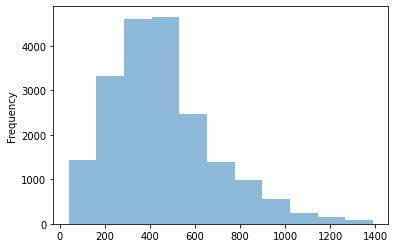

In [58]:
# most listings has wrong information on builtUp & LandArea, wrong uom, wrong propertyType etc
# too complicated to study by each property Type

# calculate the asking price psf of land area
listings['price_min_landarea_psf'] = listings['price_min'] / listings['landArea_sqf']
# listings[['price_min_landarea_psf']].describe()

min_landarea_psf, max_landarea_psf = listings['price_min_landarea_psf'].quantile([0.01, 0.99])

# drop if they are outliers
listings = listings[
    pd.isna(listings['price_min_landarea_psf']) |
    (
        (listings['price_min_landarea_psf'] > min_landarea_psf) &
        (listings['price_min_landarea_psf'] < max_landarea_psf)
    )
]

listings['price_min_landarea_psf'].plot.hist(bins = 11, alpha = 0.5)


In [59]:
listings.shape

(48232, 35)

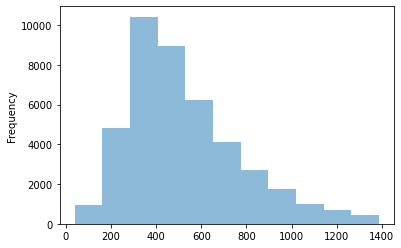

In [60]:
# calculate the asking price psf of built up area
listings['price_min_builtup_psf'] = listings['price_min'] / listings['builtUp_sqf']
# listings[['price_min_builtup_psf']].describe()

min_builtup_psf, max_builtup_psf = listings['price_min_builtup_psf'].quantile([0.01, 0.99])

# drop if they are outliers
listings = listings[
    pd.isna(listings['price_min_builtup_psf']) |
    (
        (listings['price_min_builtup_psf'] > min_landarea_psf) &
        (listings['price_min_builtup_psf'] < max_landarea_psf)
    )
]

listings['price_min_builtup_psf'].plot.hist(bins = 11, alpha = 0.5)

In [61]:
listings.shape

(46224, 36)

In [62]:
# for listings without land area, copy from built up area
listings['landArea_sqf'] = listings[['landArea_sqf', 'builtUp_sqf']].apply(
    lambda x: x['builtUp_sqf'] if pd.isna(x['landArea_sqf']) else x['landArea_sqf'], axis=1 
)

# for listings without built up area, copy from land area
listings['builtUp_sqf'] = listings[['landArea_sqf', 'builtUp_sqf']].apply(
    lambda x: x['landArea_sqf'] if pd.isna(x['builtUp_sqf']) else x['builtUp_sqf'], axis=1 
)

# re-calculate the asking price psf of land area
listings['price_min_landarea_psf'] = listings['price_min'] / listings['landArea_sqf']

# re-calculate the asking price psf of built up area
listings['price_min_builtup_psf'] = listings['price_min'] / listings['builtUp_sqf']

### Fill Missing Latitude and Logitude by Integrating Another Dataset using Township Name

In [63]:
def clean_string(string):
    return re.sub(r'\W+', '', str(string))


def retrieve_coordinates(state, city, township, latlon):
    matched_condominiums = condominiums[
        (condominiums['clean_state'] == clean_string(state)) &
        (condominiums['clean_city'] == clean_string(city)) &
        (
            (condominiums['clean_township'] == clean_string(township)) | 
            (condominiums['clean_name'] == clean_string(township))
        )
    ][latlon]
    
    if len(matched_condominiums) == 0:
        return np.nan
    else:
        return matched_condominiums.values[0]


# load data from csv
condominiums = pd.read_csv("iproperty_condominium.csv.tar.gz", compression='gzip', low_memory=False)

# drop all condominium which has no geo coordinates
condominiums = condominiums[~((condominiums['Latitude'] == 0) & (condominiums['Longitude'] == 0))]
condominiums.dropna(how='all', inplace=True)
condominiums['clean_state'] = condominiums['State'].apply(clean_string)
condominiums['clean_city'] = condominiums['City'].apply(clean_string)
condominiums['clean_township'] = condominiums['Township'].apply(clean_string)
condominiums['clean_name'] = condominiums['iproperty_condominium.csv'].apply(clean_string)

# make a copy of listings with no geo coordinates
listings_nogps = listings[
    (pd.isna(listings['latitude'])) | 
    (pd.isna(listings['longitude']))
][['state', 'city', 'township', 'latitude', 'longitude']]

# lookup geo coordinates from condominium dataset
listings_nogps['latitude'] = listings_nogps.apply(
    lambda x: retrieve_coordinates(x['state'], x['city'], x['township'], 'Latitude'), axis=1
)

listings_nogps['longitude'] = listings_nogps.apply(
    lambda x: retrieve_coordinates(x['state'], x['city'], x['township'], 'Longitude'), axis=1
)

# drop rows which failed to get geo coordinates
listings_nogps.dropna(subset=['latitude', 'longitude'], how='all').sort_values('latitude')

# update the original listings with the corrected geo coordinates
listings.loc[listings_nogps.index, 'latitude'] = listings_nogps[['latitude']]
listings.loc[listings_nogps.index, 'longitude'] = listings_nogps[['longitude']]

# drop remaining rows in the main listing with no geo coordinates
listings = listings[~pd.isna(listings['latitude'])]

In [64]:
# drop columns which no longer in use
listings.drop(['attr_landArea', 'attr_builtUp', 'attr_sizeUnit', 'township'], axis=1, inplace=True)

# drop other unuseful columns
listings.drop(['iproperty_listing.csv', 'title', 'kind', 'tier', 'formatedAddress', 'attr_downloadUrl'], axis=1, inplace=True)

In [65]:
# remaining columns with NaN value for further action
col_with_na = listings.isnull().sum()
col_with_na[~(col_with_na==0)]


attr_bedroom       976
attr_bathroom     1147
attr_carPark     14755
dtype: int64

In [66]:
# correct bedroom count
# fill as 0 for NaN value
def fix_bedroom(bedroom):
    count = str(bedroom).lower().replace("studio", "1")
    count = re.sub('[a-zA-Z]', '', count)
    
    try:
        return(eval(count))
    except:
        return(0)
    

listings['attr_bedroom'] = listings['attr_bedroom'].apply(fix_bedroom)

In [67]:
# correct bathroom count
# fill as 0 for NaN value
listings['attr_bathroom'] = listings['attr_bathroom'].apply(
    lambda x: 0 if pd.isna(x) else x
)

In [68]:
# correct bathroom count
# fill as 0 for NaN value
listings['attr_carPark'] = listings['attr_carPark'].apply(
    lambda x: 0 if pd.isna(x) else x
)

In [69]:
# remaining columns with NaN value for further action
col_with_na = listings.isnull().sum()
col_with_na[~(col_with_na==0)]


Series([], dtype: int64)

In [70]:
listings.shape

(46139, 26)

In [71]:
listings.to_csv("iproperty_listing_clean.csv")